In [24]:
from main import *
from utils import *
from preprocess import resize_and_pad
from PIL import Image, ImageDraw

In [25]:
class CFG:
    image_size = IMAGE_SIZE
    conf_thres = 0.01
    iou_thres = 0.1

cfg = CFG()

In [26]:
session = load_session(PATH_MODEL)

In [27]:
session.get_providers()

['CUDAExecutionProvider', 'CPUExecutionProvider']

In [28]:
image_cv = cv2.imread("sample/1.jpg")

In [29]:
image, ratio, (padd_left, padd_top) = resize_and_pad(image_cv, new_shape=cfg.image_size)
img_norm = normalization_input(image)

In [30]:
pred = infer(session, img_norm)
pred = postprocess(pred)[0]

[[2.80224487e+02 2.17227066e+02 3.59281799e+02 2.96908417e+02
  8.94861400e-01 2.00000000e+00]
 [3.86439323e+01 2.62787964e+02 1.41130264e+02 3.69725830e+02
  8.83763671e-01 2.00000000e+00]
 [4.02079437e+02 1.97676743e+02 4.48510834e+02 2.56870209e+02
  8.47828507e-01 2.00000000e+00]
 [3.70260681e+02 1.26294846e+02 4.08119507e+02 1.61264359e+02
  8.35532844e-01 2.00000000e+00]
 [9.67106018e+01 2.18736298e+02 1.70181885e+02 2.79365814e+02
  8.18231523e-01 2.00000000e+00]
 [1.80931091e-01 2.07207947e+02 3.68523979e+01 2.75228577e+02
  8.15709352e-01 2.00000000e+00]
 [2.00531418e+02 2.26930222e+02 2.32808914e+02 2.91617096e+02
  8.02862227e-01 3.00000000e+00]
 [3.79994263e+02 1.63633011e+02 4.35333862e+02 2.18255020e+02
  7.94868231e-01 2.00000000e+00]
 [2.42694359e+01 1.77381348e+02 9.27015686e+01 2.41411896e+02
  7.56421983e-01 2.00000000e+00]
 [1.42686661e+02 1.93143616e+02 2.01735764e+02 2.52703491e+02
  7.46193886e-01 2.00000000e+00]
 [2.85929718e+02 1.03135086e+02 3.20719879e+02 1.3

In [31]:
#print output for all objects in image
paddings = np.array([padd_left, padd_top, padd_left, padd_top])
pred[:,:4] = (pred[:,:4] - paddings) / ratio
print(pred)

[[3.12750544e+02 1.58735565e+02 4.00984151e+02 2.47665644e+02
  8.94861400e-01 2.00000000e+00]
 [4.31293888e+01 2.09584781e+02 1.57511456e+02 3.28935078e+02
  8.83763671e-01 2.00000000e+00]
 [4.48749372e+02 1.36916007e+02 5.00570127e+02 2.02980144e+02
  8.47828507e-01 2.00000000e+00]
 [4.13237367e+02 5.72487116e+01 4.55490521e+02 9.62771858e+01
  8.35532844e-01 2.00000000e+00]
 [1.07935940e+02 1.60419975e+02 1.89935139e+02 2.28086846e+02
  8.18231523e-01 2.00000000e+00]
 [2.01932022e-01 1.47553512e+02 4.11299084e+01 2.23469394e+02
  8.15709352e-01 2.00000000e+00]
 [2.23807386e+02 1.69564979e+02 2.59831377e+02 2.41760152e+02
  8.02862227e-01 3.00000000e+00]
 [4.24100740e+02 9.89207711e+01 4.85863686e+02 1.59882835e+02
  7.94868231e-01 2.00000000e+00]
 [2.70864240e+01 1.14264897e+02 1.03461572e+02 1.85727562e+02
  7.56421983e-01 2.00000000e+00]
 [1.59248505e+02 1.31856714e+02 2.25151522e+02 1.98329789e+02
  7.46193886e-01 2.00000000e+00]
 [3.19117989e+02 3.14007657e+01 3.57946294e+02 6.9

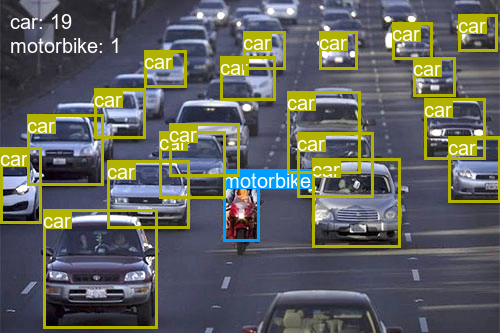

In [32]:
image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
image = Image.fromarray(image_cv)
visualize(image, pred)
 #output of motobike
 #[2.23807386e+02 1.69564979e+02 2.59831377e+02 2.41760152e+02# 8.02862227e-01 3.00000000e+00]